In [1]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


In [2]:
df = pd.read_csv(r'C:\Users\dell\Downloads\New folder (2)\Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(568454, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
df1=df.iloc[:,4:]

In [7]:
df1

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...
568449,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [8]:
df1=df1.drop('Time',axis=1)

In [9]:
df1.isnull().sum()           # to check null values in the columns

HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Summary                   27
Text                       0
dtype: int64

In [10]:
df1[df1.Summary.isnull()]       

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
33958,1,24,2,NaN,I only used two maybe three tea bags and got p...
40548,1,24,2,NaN,I only used two maybe three tea bags and got p...
101106,1,24,2,NaN,I only used two maybe three tea bags and got p...
102979,1,24,2,NaN,I only used two maybe three tea bags and got p...
117515,1,24,2,NaN,I only used two maybe three tea bags and got p...
155712,1,24,2,NaN,I only used two maybe three tea bags and got p...
178290,1,24,2,NaN,I only used two maybe three tea bags and got p...
198474,1,24,2,NaN,I only used two maybe three tea bags and got p...
212691,1,24,2,NaN,I only used two maybe three tea bags and got p...
237565,1,1,3,NaN,This is a cool system only problem is that the...


In [11]:
df1=df1.dropna()  # droping nan values

In [12]:
df1

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...
568449,0,0,5,Will not do without,Great for sesame chicken..this is a good if no...
568450,0,0,2,disappointed,I'm disappointed with the flavor. The chocolat...
568451,2,2,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,1,1,5,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [13]:
rev=df1.Score.value_counts(normalize=True)

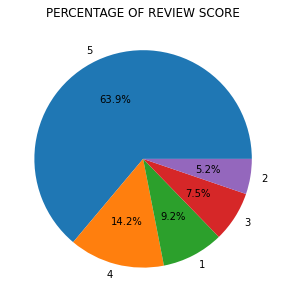

In [14]:
plt.figure(figsize=(5,5))
plt.pie(rev,labels=rev.keys(),autopct='%0.1f%%')          # check the percentage of different feedbacks star given by customers
plt.title('PERCENTAGE OF REVIEW SCORE')
plt.show()

In [15]:
score=[]
for i in df1.Score:
    if i==5:
        score.append(1)                    # replace 5 and 4 postive review with 1 and 1,2 with negative review
    elif i==4:
        score.append(1)
    elif i==3:
        score.append('N')
    elif i==2:
        score.append(0)
    elif i==1:
        score.append(0)
df1['Score']=score

In [16]:
df1=df1[df1.Score!='N']

In [17]:
df1.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,1,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,1,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,0,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,1,Great taffy,Great taffy at a great price. There was a wid...


In [18]:
# cleaning the text column

df1.Text=df1.Text.replace(r'<br .>',' ',regex=True)   

In [19]:
df1

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,1,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,1,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,0,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,1,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...
568449,0,0,1,Will not do without,Great for sesame chicken..this is a good if no...
568450,0,0,0,disappointed,I'm disappointed with the flavor. The chocolat...
568451,2,2,1,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,1,1,1,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [20]:
df1.Text=df1.Text.replace('[^a-zA-Z]',' ',regex=True)

In [21]:
stopwords = set(stopwords.words('english'))

In [22]:
lem =WordNetLemmatizer()

In [23]:
# define funtion for replaceing word to root word and removing the stopword in the columns

def rem(x):
     return ' '.join(lem.lemmatize(word) for word in str(x).split() if  word not in stopwords)

In [24]:
df1['Text']=df1['Text'].apply(lambda x:rem(x))

In [25]:
df1

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,1,Good Quality Dog Food,I bought several Vitality canned dog food prod...
1,0,0,0,Not as Advertised,Product arrived labeled Jumbo Salted Peanuts p...
2,1,1,1,"""Delight"" says it all",This confection around century It light pillow...
3,3,3,0,Cough Medicine,If looking secret ingredient Robitussin I beli...
4,0,0,1,Great taffy,Great taffy great price There wide assortment ...
...,...,...,...,...,...
568449,0,0,1,Will not do without,Great sesame chicken good better resturants I ...
568450,0,0,0,disappointed,I disappointed flavor The chocolate note espec...
568451,2,2,1,Perfect for our maltipoo,These star small give one training session I t...
568452,1,1,1,Favorite Training and reward treat,These BEST treat training rewarding dog good g...


In [26]:
cv=CountVectorizer(max_features=41157,ngram_range=(1,2),min_df=10)

In [27]:
df1.Text=df1.Text.str.lower()

In [28]:
df1.Summary=df1.Summary.str.lower()            # for for converting all the text in the lower case 

In [29]:
df1

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,1,good quality dog food,i bought several vitality canned dog food prod...
1,0,0,0,not as advertised,product arrived labeled jumbo salted peanuts p...
2,1,1,1,"""delight"" says it all",this confection around century it light pillow...
3,3,3,0,cough medicine,if looking secret ingredient robitussin i beli...
4,0,0,1,great taffy,great taffy great price there wide assortment ...
...,...,...,...,...,...
568449,0,0,1,will not do without,great sesame chicken good better resturants i ...
568450,0,0,0,disappointed,i disappointed flavor the chocolate note espec...
568451,2,2,1,perfect for our maltipoo,these star small give one training session i t...
568452,1,1,1,favorite training and reward treat,these best treat training rewarding dog good g...


In [30]:
X=cv.fit_transform(df1.Text)          
y=df1.Score

In [31]:
y=y.astype('int')

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)               #splitting data into two parts train and test


In [33]:
lr=LogisticRegression()

In [34]:
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred=lr.predict(x_test)

In [36]:
cm=confusion_matrix(y_pred,y_test)

In [37]:
cm

array([[ 19858,   2933],
       [  4459, 130487]], dtype=int64)

In [38]:
accuracy=(cm[0][0] +cm[1][1])/(cm[0][0] +cm[0][1]+cm[1][0] +cm[1][1])

In [39]:
sensitivity = cm[1,1]/(cm[1,0,]+cm[1,1])
specificity =cm[0,0]/(cm[0,0]+cm[0,1])

In [40]:
print('accuracy of the model:',accuracy)
print('sesitivity of the model:',sensitivity)
print('specificity of the model:',specificity)

accuracy of the model: 0.9531371840468628
sesitivity of the model: 0.966957153231663
specificity of the model: 0.8713088499846431


In [41]:
y_pred_proba = lr.predict_proba(x_test)[::,1]

In [42]:
fpr, tpr,_= metrics.roc_curve(y_test,  y_pred_proba)

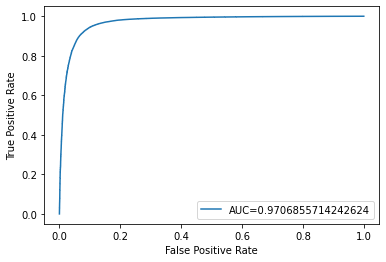

In [43]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()